<a href="https://colab.research.google.com/github/marcelounb/DeepLearning/blob/master/Projeto6_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

TensorFlow 2.x selected.


'2.1.0'

In [0]:
diabetes = pd.read_csv('/content/diabetes.csv')

In [3]:
diabetes.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

In [4]:
diabetes.describe()

Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]

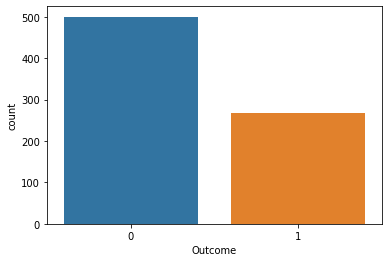

In [5]:
sns.countplot(x='Outcome', data = diabetes)

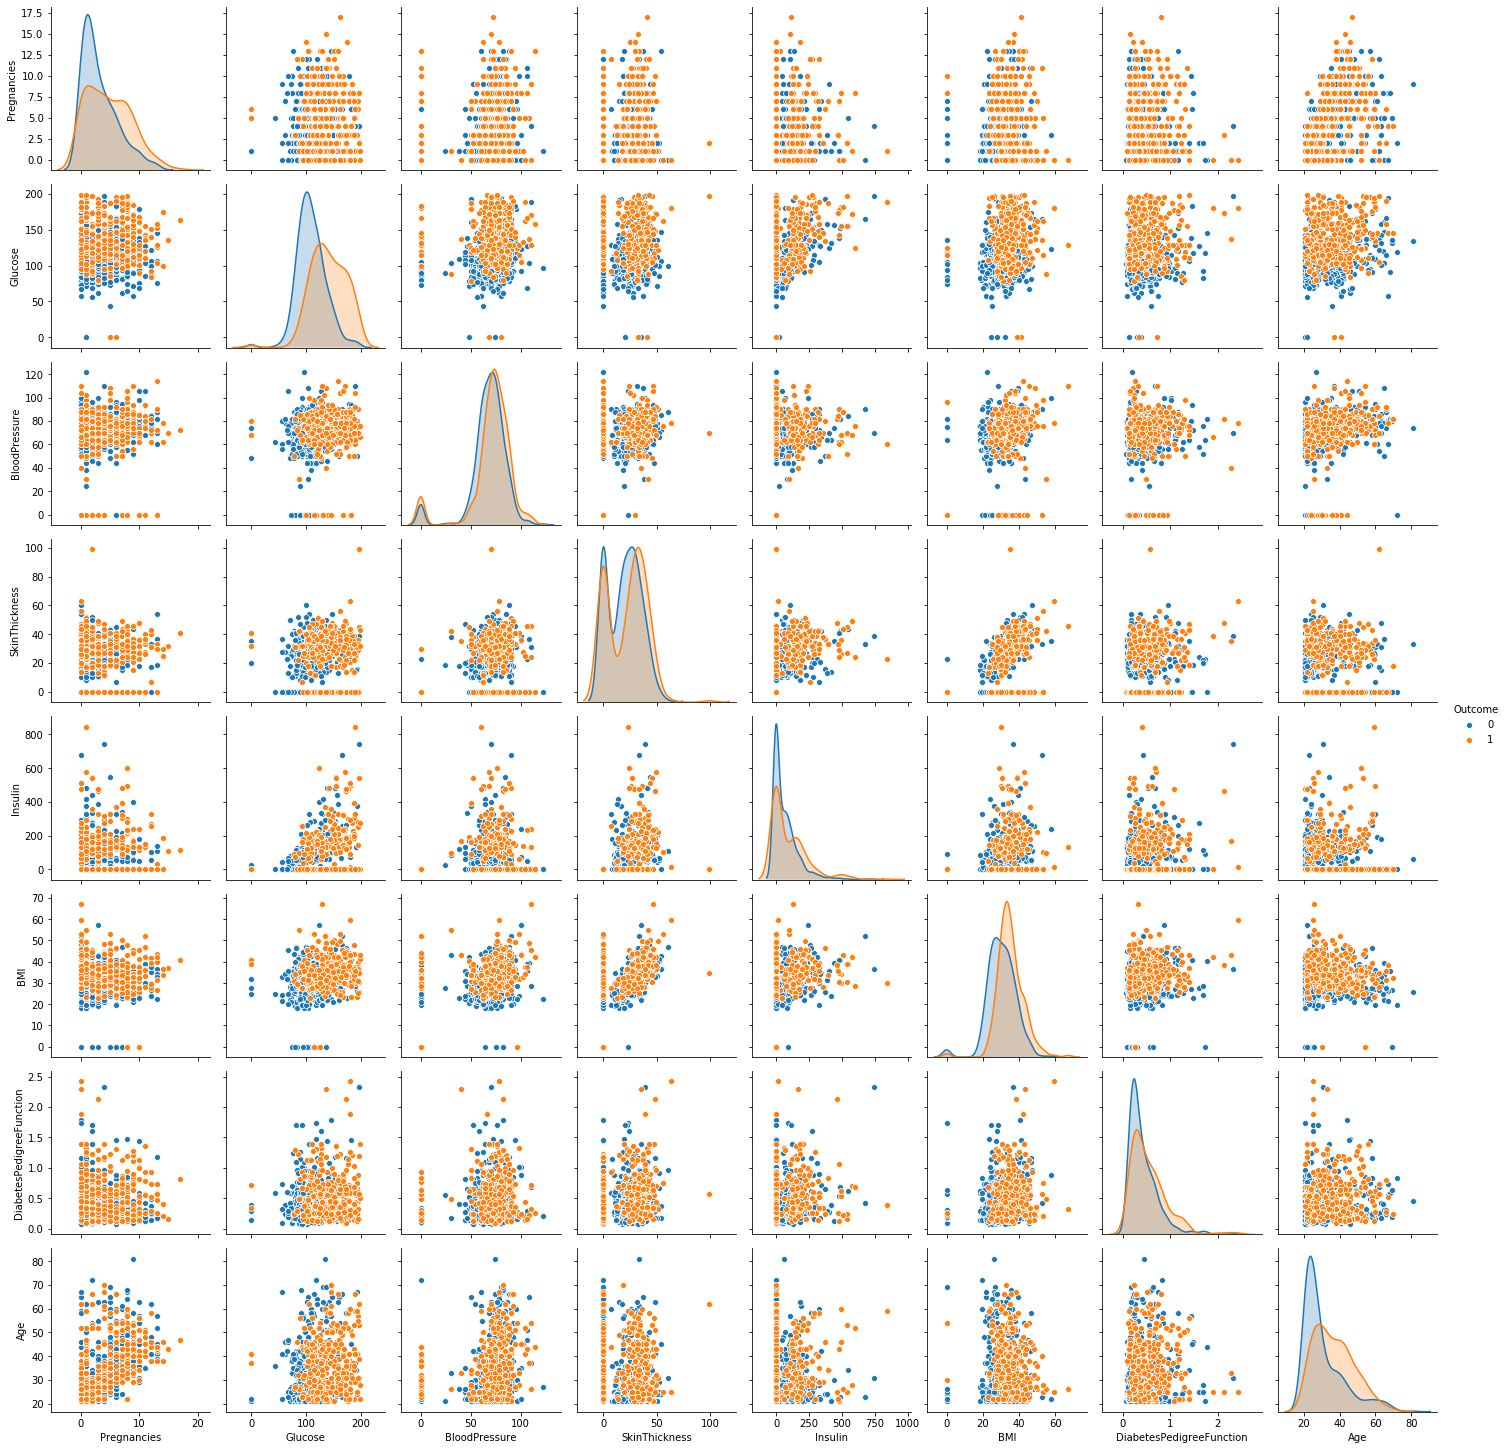

In [6]:
sns.pairplot(diabetes, hue = 'Outcome', 
             vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']);

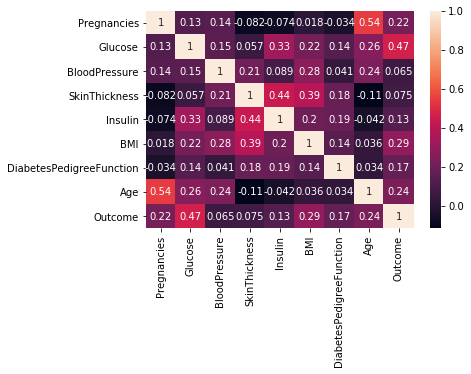

In [7]:
sns.heatmap(diabetes.corr(), annot = True);

In [8]:
diabetes.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [0]:
X = diabetes.iloc[:, 0:8].values

In [10]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [0]:
y = diabetes.iloc[:, -1].values

In [12]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [14]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  # Divisao da base de dados entre treinamento e teste

In [16]:
X_train.shape

(614, 8)

In [17]:
X_test.shape

(154, 8)

# Construção e treinamento do modelo

In [0]:
# 8 -> 400 -> 400 -> 1 :: Input shape
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(8, )))
classifier.add(tf.keras.layers.Dropout(0.2))  # Vai zerar 20% dos neuronios de cima
classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.2))  # Vai zerar 20% dos neuronios de cima
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [19]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               3600      
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 164,401
Trainable params: 164,401
Non-trainable params: 0
_________________________________________________________________


In [0]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [21]:
epochs_hist = classifier.fit(X_train, y_train, epochs = 200)

Train on 614 samples
Epoch 1/200
614/614 [==============================] - 1s 1ms/sample - loss: 0.5459 - accuracy: 0.7280
Epoch 2/200
614/614 [==============================] - 0s 124us/sample - loss: 0.4886 - accuracy: 0.7638
Epoch 3/200
614/614 [==============================] - 0s 117us/sample - loss: 0.4598 - accuracy: 0.7883
Epoch 4/200
614/614 [==============================] - 0s 122us/sample - loss: 0.4527 - accuracy: 0.7752
Epoch 5/200
614/614 [==============================] - 0s 127us/sample - loss: 0.4423 - accuracy: 0.7769
Epoch 6/200
614/614 [==============================] - 0s 128us/sample - loss: 0.4434 - accuracy: 0.7785
Epoch 7/200
614/614 [==============================] - 0s 120us/sample - loss: 0.4371 - accuracy: 0.7866
Epoch 8/200
614/614 [==============================] - 0s 140us/sample - loss: 0.4286 - accuracy: 0.7915
Epoch 9/200
614/614 [==============================] - 0s 145us/sample - loss: 0.4253 - accuracy: 0.7932
Epoch 10/200
614/614 [==============

In [0]:
y_pred = classifier.predict(X_test)

In [23]:
y_pred

array([[1.93230133e-03],
       [9.97030258e-01],
       [1.14934228e-01],
       [1.51331566e-04],
       [2.12112991e-06],
       [3.07914382e-03],
       [2.78223958e-03],
       [1.59889609e-02],
       [3.45696307e-08],
       [2.32831517e-04],
       [1.00000000e+00],
       [3.17061335e-01],
       [9.99633431e-01],
       [4.04920029e-05],
       [2.15616092e-01],
       [3.66204622e-10],
       [4.88778051e-06],
       [4.20581014e-10],
       [9.99954104e-01],
       [9.99999881e-01],
       [6.00332672e-09],
       [1.00000000e+00],
       [5.91972061e-02],
       [5.97061899e-07],
       [1.74347399e-04],
       [9.62772965e-01],
       [2.73471382e-02],
       [9.99912858e-01],
       [4.85149201e-08],
       [2.33302283e-14],
       [1.80670503e-03],
       [9.31897104e-01],
       [7.44794888e-05],
       [2.58507760e-04],
       [6.72659874e-02],
       [6.57345900e-10],
       [9.90937591e-01],
       [7.44424164e-02],
       [8.90291631e-01],
       [9.99764621e-01],


In [0]:
y_pred = (y_pred > 0.5)

In [25]:
y_pred

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [26]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

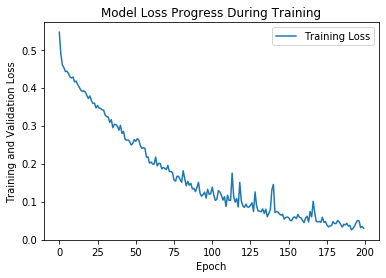

In [27]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss']);

In [31]:

# Para fazer uma previsao: Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome**not this one - outcome expected to be 1
X_test_previsao = np.array([[0,118,84,47,230,45.8,0.551,31]])
X_test_previsao_scaled = sc.fit_transform(X_test_previsao)
y_predict_previsao_scaled = classifier.predict(X_test_previsao_scaled)
# y_predict_previsao = sc.inverse_transform(y_predict_previsao_scaled)  # https://stackoverflow.com/questions/38058774/scikit-learn-how-to-scale-back-the-y-predicted-result ver aqui como faz
y_predict_previsao_scaled

array([[0.83945817]], dtype=float32)

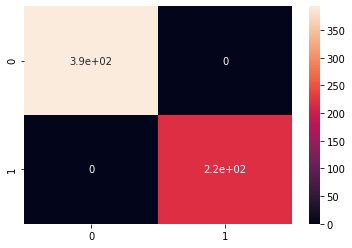

In [32]:
from sklearn.metrics import confusion_matrix
y_train_pred = classifier.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True);

In [33]:
cm

array([[393,   0],
       [  0, 221]])

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       393
        True       1.00      1.00      1.00       221

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



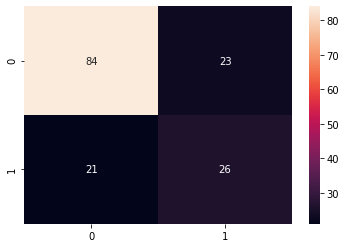

In [35]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       107
           1       0.53      0.55      0.54        47

    accuracy                           0.71       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.72      0.71      0.72       154

